**Course:** Machine Learning by Dr. Seyyed Salehi

**Homework:** HW1

**Name:** Mohammad Mohammadi

**Student ID:** 402208592

In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
# TODO
df = pd.read_csv('./heart.csv')

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Number of Samples: 1025
Number of Features: 14
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Checking for Missing Values:
age        

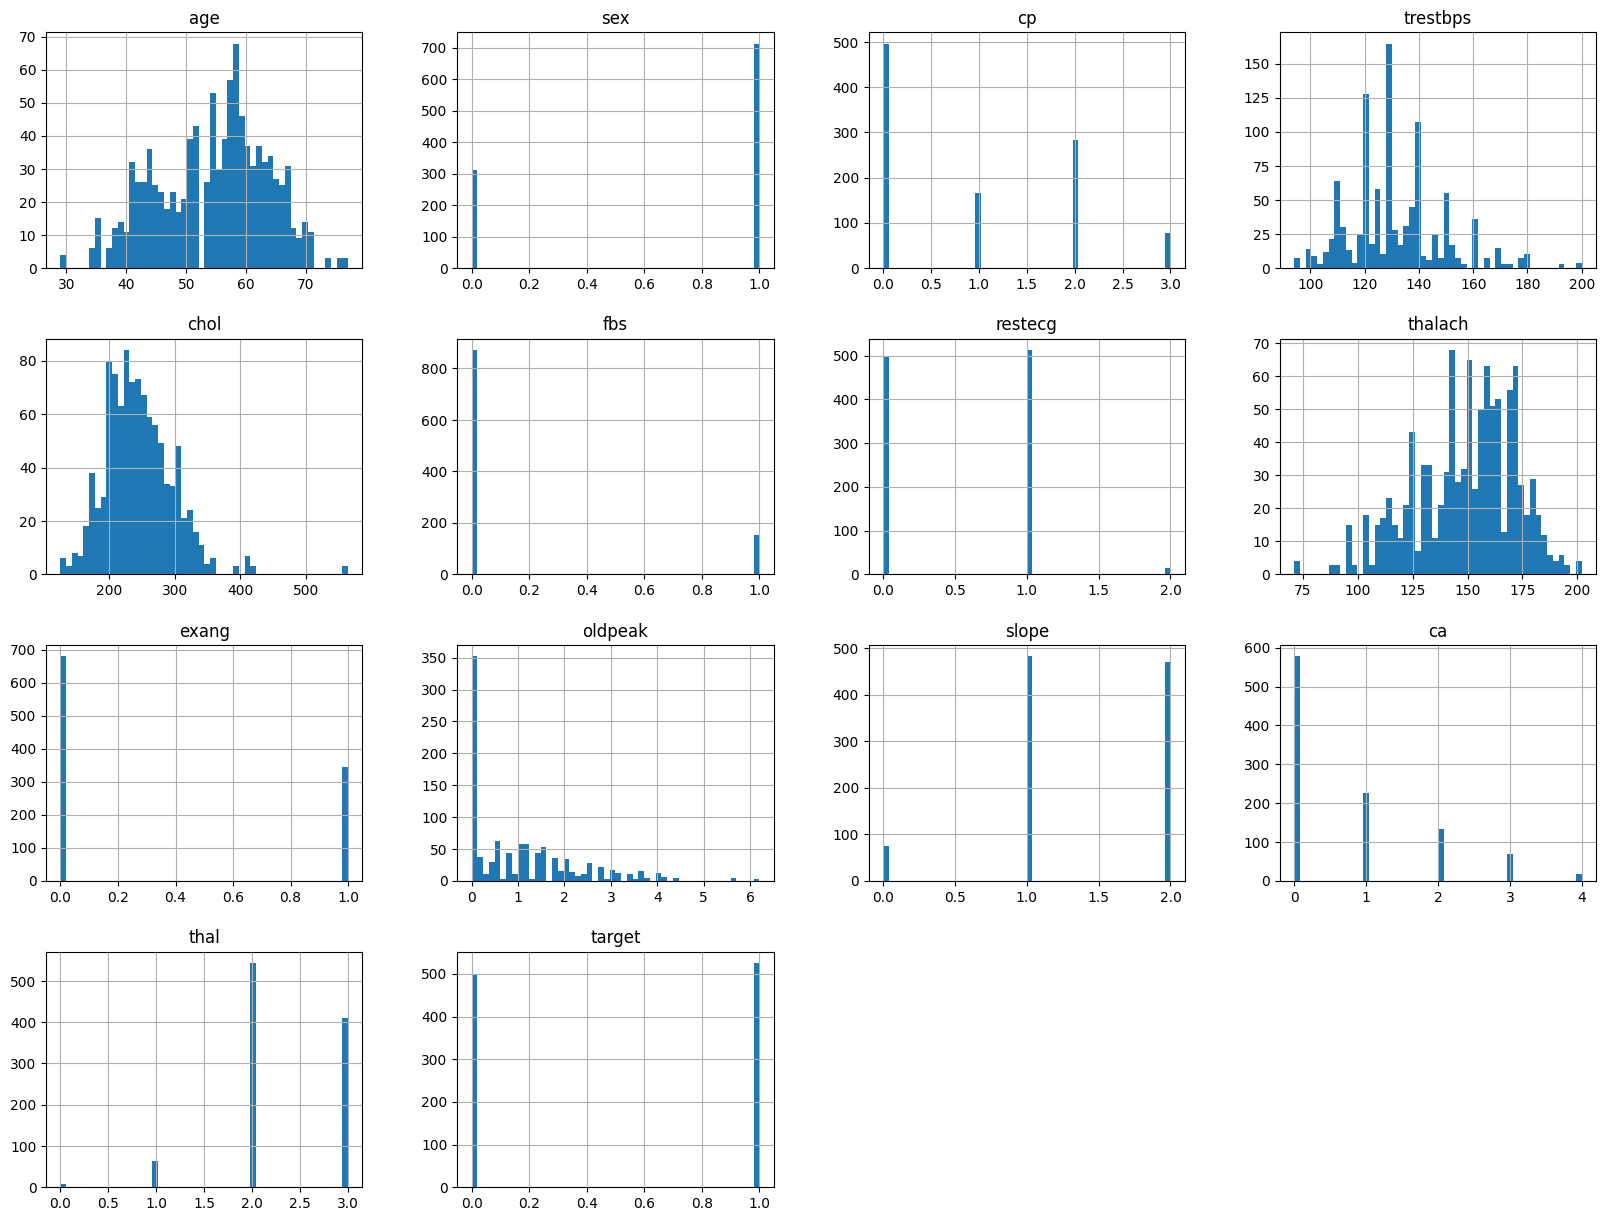

Box plot (to identify outliers and the spread of data)


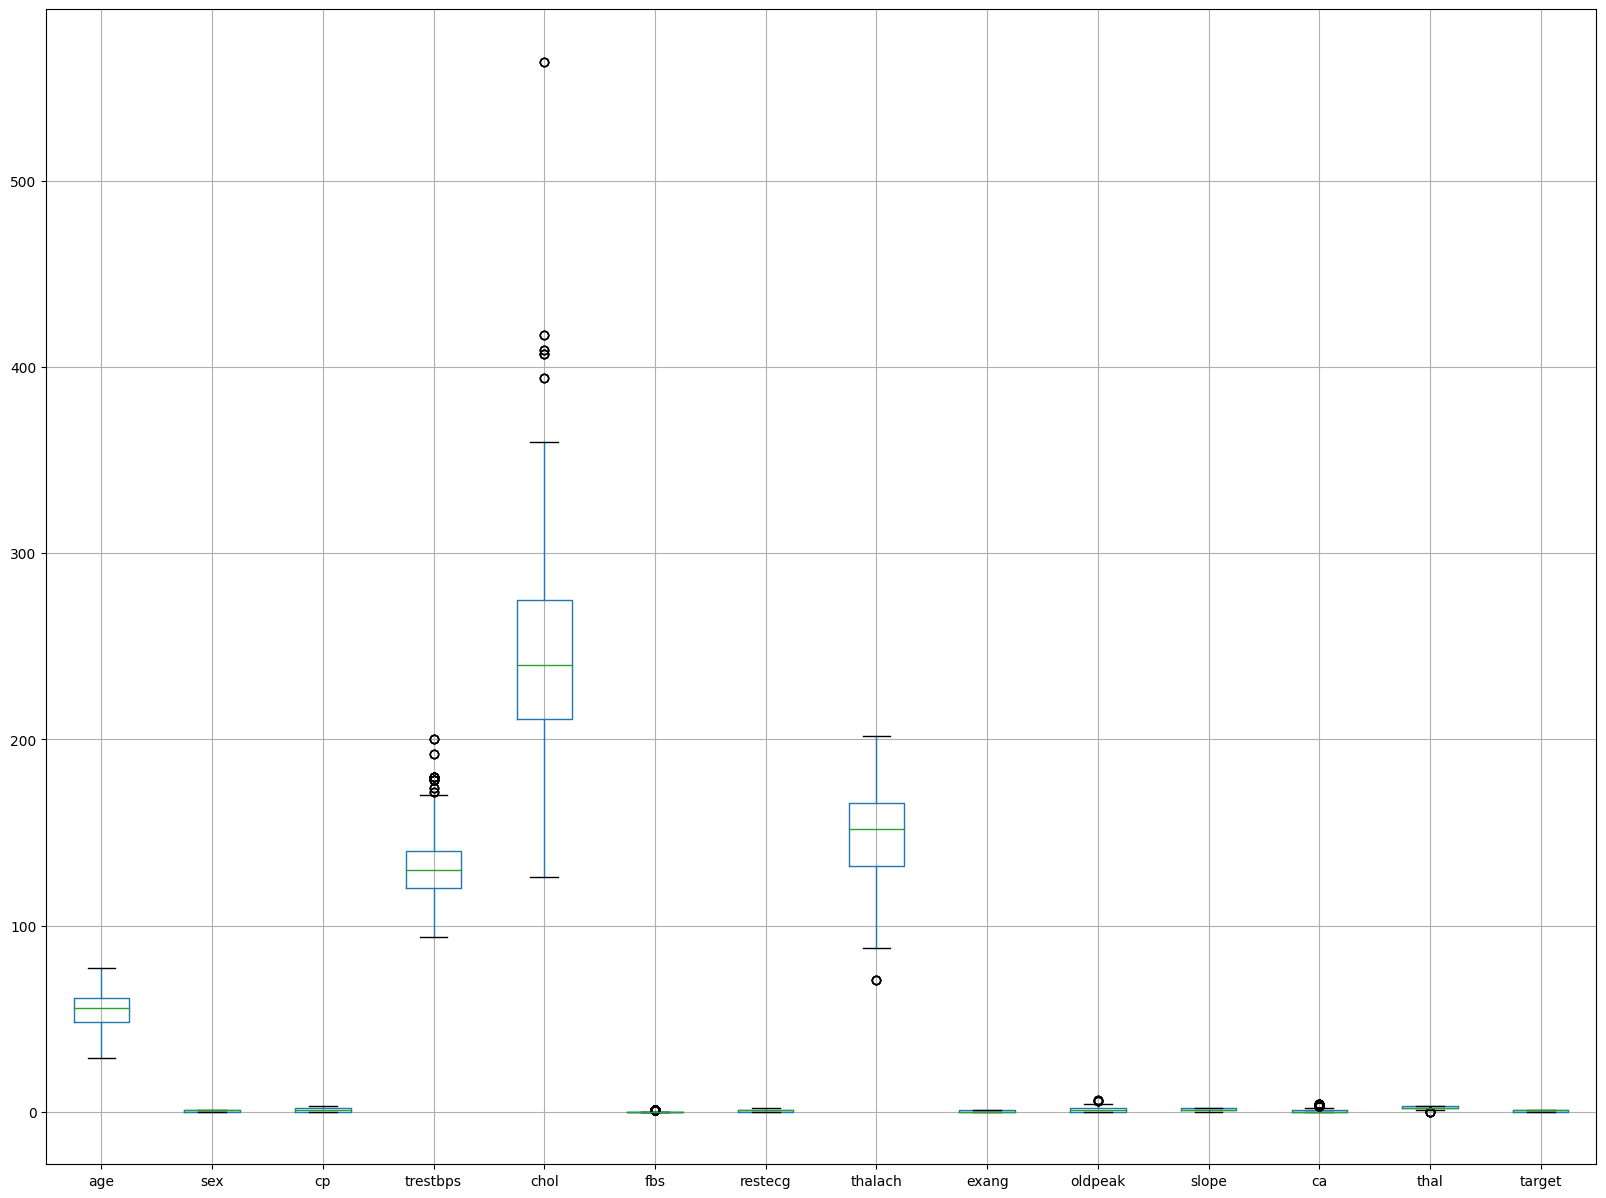

Scatter plot (for visualizing potential relationships between variables)


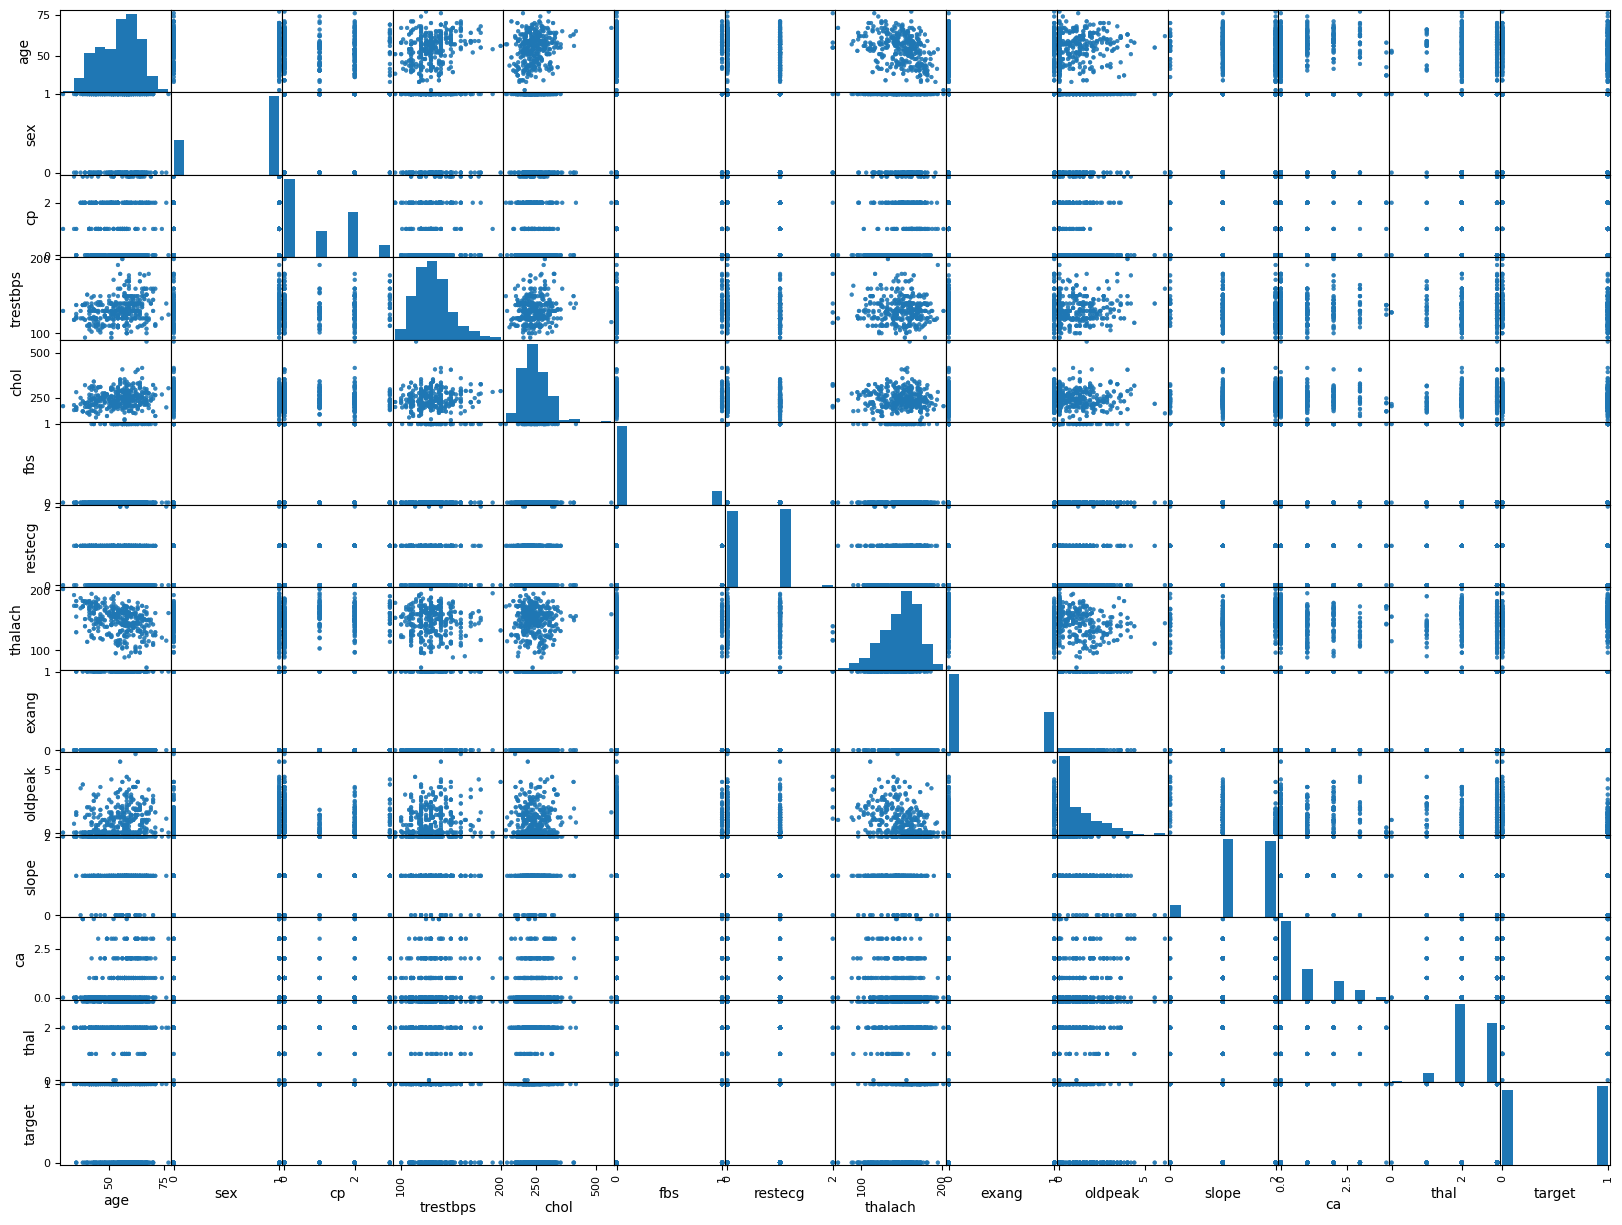

In [6]:
# TODO

import matplotlib.pyplot as plt

# First we try to get familiar with the dataset columns and display the first
# few rows of the dataframe.
print(df.head())

# Then to understand the scale of your dataset:
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

# To know the type of data (numerical, categorical) we use the command below
# which is crucial for determining the type of statistical analysis or
# visualization techniques to apply:
print(df.dtypes)

print("Checking for Missing Values:")
print(df.isnull().sum())

print("Overview of the numerical features' distribution:")
print(df.describe())

print("Distribution of Categorical Features: ")
# Assuming 'sex' is a categorical feature representing gender
print(df['sex'].value_counts())

print("Correlation Analysis: ")
# Correlation analysis can help us identify potential relationships between
# variables, which might be relevant for predicting heart disease:
print(df.corr())

print("Visualizing data: ")
print("Histogram (for understanding the distribution of numerical variables)")
df.hist(bins=50, figsize=(20,15))
plt.show()
print("Box plot (to identify outliers and the spread of data)")
df.boxplot(figsize=(20,15))
plt.show()
print("Scatter plot (for visualizing potential relationships between variables)")
pd.plotting.scatter_matrix(df, figsize=(20, 15))
plt.show()


## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [7]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [8]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [9]:
def perceptron_sgd(X, Y):
    '''
    # TODO: implement the below

    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate

    '''

    # Initialize the weight vector for the perceptron with zeros
    w = np.zeros(len(X[0]))
    # Set the learning rate
    eta = 1
    # Set the number of epochs
    n_epochs = 10

    # Iterate n times over the whole dataset
    for epoch in range(n_epochs):
        # Iterate over each sample in the dataset
        for i, x in enumerate(X):
            # Misclassification condition y_i * (x_i . w) <= 0
            if (Y[i] * np.dot(X[i], w)) <= 0:
                # Update rule for the weights w = w + eta * y_i * x_i
                w = w + eta * Y[i] * X[i]


    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [10]:
def perceptron_sgd_plot(X, Y):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''

    # Your Implementation here

    # Initialize the weight vector for the perceptron with zeros
    w = np.zeros(len(X[0]))
    # Set the learning rate
    eta = 0.02
    # Set the number of epochs
    n_epochs = 877
    # List to store the total loss in each epoch
    errors = []

    # Transform labels from (0, 1) to (-1, 1)
    Y_transformed = np.where(Y == 0, -1, 1)

    # Iterate n times over the whole dataset
    for epoch in range(n_epochs):
        total_loss = 0
        # Iterate over each sample in the dataset
        for i, x in enumerate(X):
            # Calculate the prediction
            prediction = np.dot(X[i], w)
            # Calculate the hinge loss
            loss = max(0, 1 - Y_transformed[i] * prediction)
            # Update total loss
            total_loss += loss
            # Misclassification condition y_i * (x_i . w) <= 0
            if (Y_transformed[i] * prediction) <= 0:
                # Update rule for the weights w = w + eta * y_i * x_i
                w = w + eta * Y_transformed[i] * X[i]
        # Append the total loss for this epoch to the list
        errors.append(total_loss)

    # Plotting the total loss in each epoch
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

In [11]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [12]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
bias_column = np.full((X.shape[0], 1), -1)

# Concatenate the original X with the bias column
X = np.hstack((X, bias_column))

In [13]:
# TODO: Split the data to train and test with a 0.2 ratio


# ONLY USED SKLEARN FOR SPLITTING AS IT HAS SHUFFLE AND WAS ALLOWED BY THE TA
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

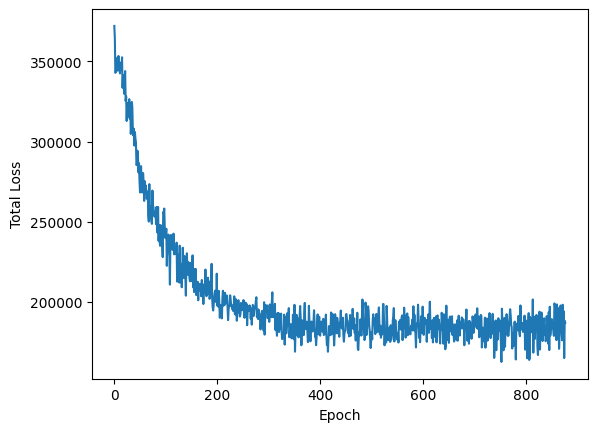

In [14]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [15]:
def accuracy_score(y_true, y_pred):
    #TODO: Your implementation

    # Transform labels from (0, 1) to (-1, 1)
    y_true_transformed = np.where(y_true == 0, -1, 1)

    # Correctly predicted labels
    correct_predictions = sum(y_true_transformed == y_pred)

    # Total predictions
    total_predictions = len(y_true_transformed)

    accuracy = correct_predictions / total_predictions

    return accuracy

Get the accuracy of your model using the function you implemented.

In [16]:
# TODO

def predict(X, w):
    predictions = np.sign(np.dot(X, w))
    return predictions

predictions = predict(X_val, w)
print(accuracy_score(y_val, predictions))

0.7268292682926829


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [17]:
def confusion_matrix(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix

    # Creating a mapping of labels to indices
    label_to_index = {label: index for index, label in enumerate(labels)}

    # Transform labels from (0, 1) to (-1, 1)
    actual_transformed = np.where(actual == 0, -1, 1)

    # Now populating the confusion matrix
    for a, p in zip(actual_transformed, predicted):
        matrix[label_to_index[a]][label_to_index[p]] += 1

    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [16]:
import seaborn as sns

def plot_confusion_matrix(matrix, labels):
    #TODO: plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Now plot the confusion matrix for your model:

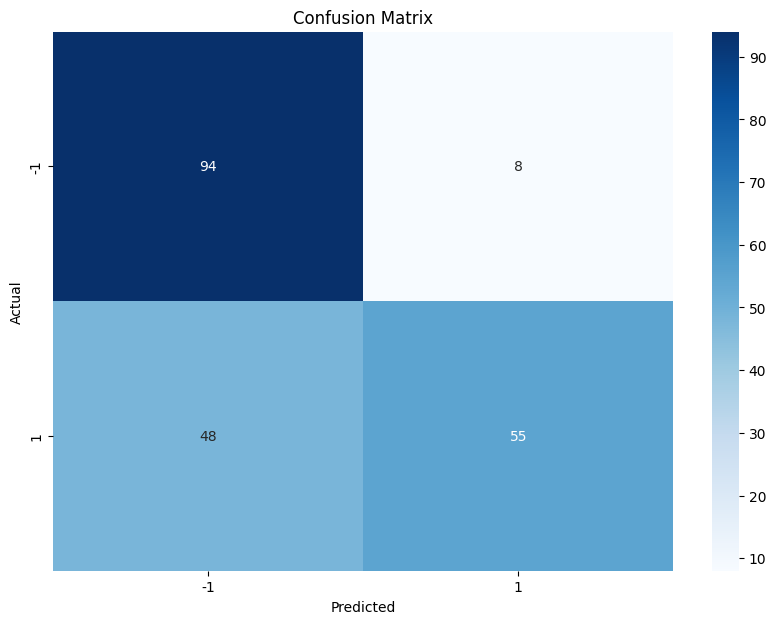

In [19]:
# TODO

labels = [-1, 1]
conf_matrix = confusion_matrix(y_val, predictions, labels)

plot_confusion_matrix(conf_matrix, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [20]:
print(conf_matrix)

[[94  8]
 [48 55]]


In [18]:
def recall_score(cm):
    #TODO: return the recall score
    true_positive = cm[1][1]
    false_negative = cm[1][0]
    recall = true_positive / (true_positive + false_negative)
    return recall

print(recall_score(conf_matrix))

0.7659574468085106


In [19]:
def precision_score(cm):
    #TODO: return the precision score
    true_positive = cm[1][1]
    false_positive = cm[0][1]
    precision = true_positive / (true_positive + false_positive)
    return precision

print(precision_score(conf_matrix))

0.6923076923076923


In [20]:
def f1_score(cm):
    #TODO: return the f1 score
    precision = precision_score(cm)
    recall = recall_score(cm)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

print(f1_score(conf_matrix))

0.7272727272727273


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [6]:
class MixedDataNB:

    def __init__(self):
        self.priors = {}
        self.means = {}
        self.vars = {}
        self.cat_probs = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]

        # Initializing storage for calculations
        self.means = {c: np.zeros(n_features) for c in self.classes}
        self.vars = {c: np.zeros(n_features) for c in self.classes}
        self.cat_probs = {c: {i: {} for i in range(n_features)} for c in self.classes}
        self.priors = {c: len(y[y == c]) / len(y) for c in self.classes}

        # Separating continuous and categorical features
        continuous_indices = [0, 3, 4, 7, 9]  # Indexes from dataset
        categorical_indices = [i for i in range(n_features) if i not in continuous_indices]

        # Calculating means and variances for continuous features
        for c in self.classes:
            c_indices = np.where(y == c)[0]
            for i in continuous_indices:
                self.means[c][i] = np.mean(X[c_indices, i])
                self.vars[c][i] = np.var(X[c_indices, i], ddof=1)  # Using ddof=1 for sample variance

            # Calculating probabilities for categorical features
            for i in categorical_indices:
                feature_vals, counts = np.unique(X[c_indices, i], return_counts=True)
                total_count = sum(counts)
                for val, count in zip(feature_vals, counts):
                    self.cat_probs[c][i][val] = count / total_count

    def predict(self, X):
        n_rows, n_features = X.shape
        predictions = np.zeros(n_rows)

        continuous_indices = [0, 3, 4, 7, 9]  # Indexes from dataset
        categorical_indices = [i for i in range(n_features) if i not in continuous_indices]

        for index, sample in enumerate(X):
            log_probs = {}
            for c in self.classes:
                # Continuous features
                cont_prob = np.sum(-0.5 * np.log(2 * np.pi * self.vars[c][continuous_indices])
                                   - ((sample[continuous_indices] - self.means[c][continuous_indices]) ** 2) /
                                   (2 * self.vars[c][continuous_indices]))

                # Categorical features
                cat_prob = 0
                for i in categorical_indices:
                    if sample[i] in self.cat_probs[c][i]:
                        cat_prob += np.log(self.cat_probs[c][i][sample[i]])
                    else:
                        cat_prob += np.log(1e-6)  # Smoothing for unseen category

                # Total log probability
                log_probs[c] = cont_prob + cat_prob + np.log(self.priors[c])

            predictions[index] = max(log_probs, key=log_probs.get)

        return predictions.astype(int)


## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [25]:
# TODO

# ONLY USED SKLEARN FOR SPLITTING AS IT HAS SHUFFLE AND WAS ALLOWED BY THE TA
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Model training

In [26]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

### Make predictions

In [27]:
# TODO
# Make predictions on the validation set
y_pred = model.predict(X_val)
predictions = y_pred

### Accuracy

As in Naive Bayes the labels are not (-1, 1) we define a new accuracy function which does not transform the labels so that they don't mix-up with each other.

In [28]:
def accuracy_score_without_transform(y_true, y_pred):
    #TODO: Your implementation

    # Correctly predicted labels
    correct_predictions = sum(y_true == y_pred)

    # Total predictions
    total_predictions = len(y_true)

    accuracy = correct_predictions / total_predictions

    return accuracy

Get the accuracy of your model using the function you implemented.

In [29]:
print(accuracy_score_without_transform(y_val, predictions))

0.8097560975609757


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

In [30]:
def confusion_matrix_without_transform(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix

    # Creating a mapping of labels to indices
    label_to_index = {label: index for index, label in enumerate(labels)}

    # Now populating the confusion matrix
    for a, p in zip(actual, predicted):
        matrix[label_to_index[a]][label_to_index[p]] += 1

    return matrix

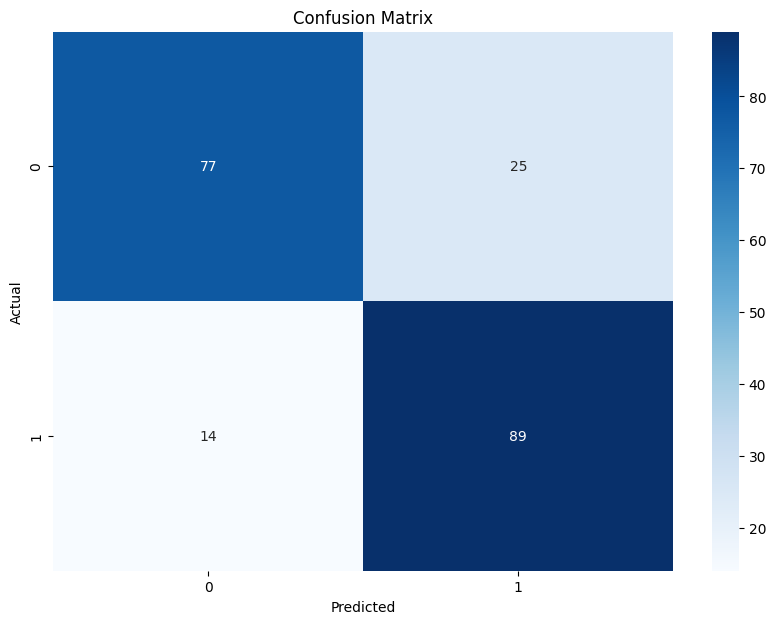

In [31]:
# TODO

labels = [0, 1]
conf_matrix = confusion_matrix_without_transform(y_val, predictions, labels)

plot_confusion_matrix(conf_matrix, labels)

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [32]:
print(recall_score(conf_matrix))

0.8640776699029126


In [33]:
print(precision_score(conf_matrix))

0.7807017543859649


In [34]:
print(f1_score(conf_matrix))

0.8202764976958525


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


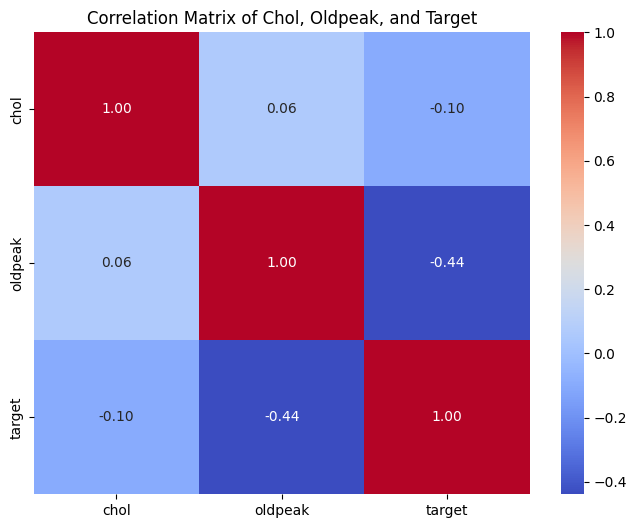

In [35]:
# TODO
# We will plot the correlation matrix including chol, oldpeak, and the target
# in two pairs to see how these features correlate with the target


features_of_interest = ['chol', 'oldpeak', 'target']
correlation_matrix = df[features_of_interest].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Chol, Oldpeak, and Target')
plt.show()


**Comparison:**

High absolute correlation values indicate a stronger relationship with the target, which implies usefulness for prediction.

Based on this fact and the heatmap above, it seems like oldpeak is more corelated to the target and hence, more useful for prediction than chon (by around 4x).

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [36]:
class MixedDataNBNoChol:
    def __init__(self):
        self.priors = {}
        self.means = {}
        self.vars = {}
        self.cat_probs = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)

        # Removing 'chol' feature from X
        X_adj = np.delete(X, 4, axis=1)  # chol is at index 4

        # Continuous features after removing 'chol'
        continuous_indices = [0, 3, 6, 8]  # Adjusted after removing 'chol'
        # Adjusting categorical_indices to reflect the removal of 'chol'
        categorical_indices = [i for i in range(X_adj.shape[1]) if i not in continuous_indices]

        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.means = {c: np.zeros(len(continuous_indices)) for c in self.classes}
        self.vars = {c: np.zeros(len(continuous_indices)) for c in self.classes}
        self.cat_probs = {c: {i: {} for i in categorical_indices} for c in self.classes}

        for c in self.classes:
            # Filter rows by class
            class_rows = y == c
            # Separate continuous features for class
            X_cont = X_adj[class_rows][:, continuous_indices]
            # Calculate means and variances
            self.means[c] = np.mean(X_cont, axis=0)
            self.vars[c] = np.var(X_cont, axis=0, ddof=1)

            # Handle categorical features
            for i in categorical_indices:
                # Calculate probabilities for categorical features
                feature, counts = np.unique(X_adj[class_rows, i], return_counts=True)
                total = counts.sum()
                self.cat_probs[c][i] = {f: count / total for f, count in zip(feature, counts)}

    def predict(self, X):
        # Ensure X_adj is 2D after removing 'chol'
        X_adj = np.delete(X, 4, axis=1)
        X_adj = np.atleast_2d(X_adj)  # Ensure 2D
        predictions = []

        continuous_indices = [0, 3, 6, 8]  # Adjusted for 'chol' removal
        categorical_indices = [i for i in range(X_adj.shape[1]) if i not in continuous_indices]

        for x in X_adj:
            log_probs = {}
            for c in self.classes:
                # Continuous features log probability
                mean_diff = x[continuous_indices] - self.means[c]
                cont_log_prob = -0.5 * np.sum(np.log(2 * np.pi * self.vars[c])) - 0.5 * np.sum((mean_diff ** 2) / self.vars[c])

                # Categorical features log probability
                cat_log_prob = 0
                for i in categorical_indices:
                    xi = x[i]
                    cat_log_prob += np.log(self.cat_probs[c][i].get(xi, 1e-6))

                # Total log probability for class c
                log_probs[c] = cont_log_prob + cat_log_prob + np.log(self.priors[c])

            # Predict class with highest log probability
            predictions.append(max(log_probs, key=log_probs.get))

        return np.array(predictions)

# Note: This class definition assumes that you'll update your dataset accordingly before using it.


In [37]:
# TODO

# ONLY USED SKLEARN FOR SPLITTING AS IT HAS SHUFFLE AND WAS ALLOWED BY THE TA
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('target', axis=1).to_numpy()
y = df['target'].to_numpy()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# TODO
model = MixedDataNBNoChol()
model.fit(X_train, y_train)

In [39]:
# TODO
# Make predictions on the validation set
y_pred = model.predict(X_val)
predictions = y_pred

In [40]:
def accuracy_score_without_transform(y_true, y_pred):
    #TODO: Your implementation

    # Correctly predicted labels
    correct_predictions = sum(y_true == y_pred)

    # Total predictions
    total_predictions = len(y_true)

    accuracy = correct_predictions / total_predictions

    return accuracy

In [41]:
print(accuracy_score_without_transform(y_val, predictions))

0.8097560975609757


Remove oldpeak and test model

In [42]:
# TODO
class MixedDataNBNoOldpeak:
    def __init__(self):
        self.priors = {}
        self.means = {}
        self.vars = {}
        self.cat_probs = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)

        # Removing 'oldpeak' feature from X
        X_adj = np.delete(X, 9, axis=1)  # oldpeak is at index 9

        # Continuous features after removing 'oldpeak'
        continuous_indices = [0, 3, 4, 7]  # Adjusted after removing 'oldpeak'
        # Adjusting categorical_indices to reflect the removal of 'oldpeak'
        categorical_indices = [i for i in range(X_adj.shape[1]) if i not in continuous_indices]

        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.means = {c: np.zeros(len(continuous_indices)) for c in self.classes}
        self.vars = {c: np.zeros(len(continuous_indices)) for c in self.classes}
        self.cat_probs = {c: {i: {} for i in categorical_indices} for c in self.classes}

        for c in self.classes:
            # Filter rows by class
            class_rows = y == c
            # Separate continuous features for class
            X_cont = X_adj[class_rows][:, continuous_indices]
            # Calculate means and variances
            self.means[c] = np.mean(X_cont, axis=0)
            self.vars[c] = np.var(X_cont, axis=0, ddof=1)

            # Handle categorical features
            for i in categorical_indices:
                # Calculate probabilities for categorical features
                feature, counts = np.unique(X_adj[class_rows, i], return_counts=True)
                total = counts.sum()
                self.cat_probs[c][i] = {f: count / total for f, count in zip(feature, counts)}

    def predict(self, X):
        # Ensure X_adj is 2D after removing 'oldpeak'
        X_adj = np.delete(X, 9, axis=1)
        X_adj = np.atleast_2d(X_adj)  # Ensure 2D
        predictions = []

        continuous_indices = [0, 3, 4, 7]  # Adjusted for 'oldpeak' removal
        categorical_indices = [i for i in range(X_adj.shape[1]) if i not in continuous_indices]

        for x in X_adj:
            log_probs = {}
            for c in self.classes:
                # Continuous features log probability
                mean_diff = x[continuous_indices] - self.means[c]
                cont_log_prob = -0.5 * np.sum(np.log(2 * np.pi * self.vars[c])) - 0.5 * np.sum((mean_diff ** 2) / self.vars[c])

                # Categorical features log probability
                cat_log_prob = 0
                for i in categorical_indices:
                    xi = x[i]
                    cat_log_prob += np.log(self.cat_probs[c][i].get(xi, 1e-6))

                # Total log probability for class c
                log_probs[c] = cont_log_prob + cat_log_prob + np.log(self.priors[c])

            # Predict class with highest log probability
            predictions.append(max(log_probs, key=log_probs.get))

        return np.array(predictions)

# Note: This class definition assumes that you'll update your dataset accordingly before using it.


In [43]:
# TODO
model = MixedDataNBNoOldpeak()
model.fit(X_train, y_train)

In [44]:
# TODO
# Make predictions on the validation set
y_pred = model.predict(X_val)
predictions = y_pred

In [45]:
def accuracy_score_without_transform(y_true, y_pred):
    #TODO: Your implementation

    # Correctly predicted labels
    correct_predictions = sum(y_true == y_pred)

    # Total predictions
    total_predictions = len(y_true)

    accuracy = correct_predictions / total_predictions

    return accuracy

In [46]:
print(accuracy_score_without_transform(y_val, predictions))

0.8097560975609757


Comparison

**Answer:**

As we can see removing chol or oldpeak individually does not effect the accuracy of the model by any fraction. Because of this fact we try to delve deeper into the matter.

In heatmap of correlation of features with target, high absolute correlation values indicate a stronger relationship with the target, which implies usefulness for prediction.

Based on this fact and the heatmap provided earlier above, it seems like oldpeak is more corelated to the target and hence, more useful for prediction than chon (by around 4x).

But it does not seem to effect the accuracy so let's try to plot density plots for both features to analyze deeper.



<ipython-input-50-fba6176c3bee>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 0]['chol'], label='No Heart Disease', shade=True)
<ipython-input-50-fba6176c3bee>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 1]['chol'], label='Heart Disease', shade=True)
<ipython-input-50-fba6176c3bee>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == 0]['oldpeak'], label='No Heart Disease', shade=True)
<ipython-input-50-fba6176c3bee>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please upda

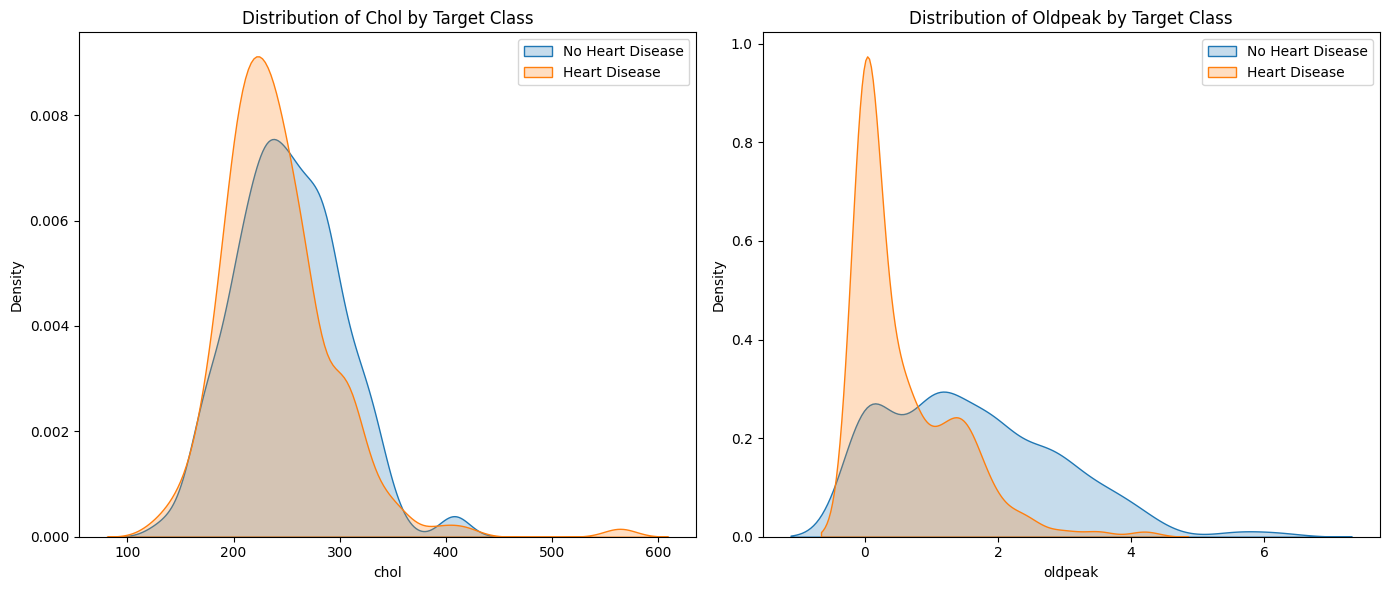

In [50]:
df['chol'] = df['chol'].astype(float)
df['oldpeak'] = df['oldpeak'].astype(float)

plt.figure(figsize=(14, 6))

# Chol feature distribution
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['target'] == 0]['chol'], label='No Heart Disease', shade=True)
sns.kdeplot(df[df['target'] == 1]['chol'], label='Heart Disease', shade=True)
plt.title('Distribution of Chol by Target Class')
plt.xlabel('chol')
plt.ylabel('Density')
plt.legend()

# Oldpeak feature distribution
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['target'] == 0]['oldpeak'], label='No Heart Disease', shade=True)
sns.kdeplot(df[df['target'] == 1]['oldpeak'], label='Heart Disease', shade=True)
plt.title('Distribution of Oldpeak by Target Class')
plt.xlabel('oldpeak')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

As we can see:
*   For chol: High chol levels have been linked to heart disease. But, the relationship isn't straightforward, as individuals with heart disease might have normal or even low chol levels. The distribution of chol levels among those with and without heart disease might overlap significantly, potentially reducing the discriminative power of this feature alone.
*   For oldpeak: This feature might provide more specific insight into heart-related issues, potentially making it a stronger predictor of heart disease as it has less overlaping area.

While both features are relevant for diagnosing heart disease, oldpeak might offer more direct evidence of heart stress or damage, especially in the context of exercise, compared to chol, which requires a broader context to interpret.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:

Based on the metrics, the Naive Bayes model performed better than the Perceptron on the given heart.csv dataset.

Comparing the two models across different metrics we have:

*   **Accuracy:** Naive Bayes (0.81) outperforms the Perceptron (0.73), indicating a higher overall rate of correct predictions.
*   **Recall:** Naive Bayes (0.86) significantly outperforms the Perceptron (0.53), suggesting that Naive Bayes is much better at identifying true positives from the available positive cases.
*   **Precision:** While the Perceptron (0.87) has a slightly higher precision than Naive Bayes (0.78), indicating a slightly higher ratio of correctly predicted positive observations from all predicted positives, this advantage is not enough to outweigh its lower performance in other areas.
*   **F1 Score:** Naive Bayes (0.82) also leads in terms of the F1 score compared to the Perceptron (0.66), indicating a better balance between precision and recall.


Factors influencing the difference in their performance (By definitions of both models):

The Perceptron assumes that the data can be separated by a linear boundary. If this assumption does not hold due to the complexity or non-linearity in the data, its performance can suffer. Where Naive Bayes does not make such linearity assumptions and instead by definition relies on statistical properties of the features. It handles both continuous and categorical data by assuming a particular distribution too.

The Perceptron does not explicitly consider the relationship between features, focusing instead on finding a weight vector that separates the classes. WHile Naive Bayes assumes feature independence given the class, an assumption that can result in high performance for classification tasks due to its probabilistic nature.

The Perceptron model is straightforward and may underfit complex datasets. It has fewer mechanisms for handling overfitting or for regularizing the model.

Naive Bayes can be surprisingly robust and often performs well even on complex datasets, thanks to its probabilistic foundation and the way it handles different types of features.

The higher recall of the Naive Bayes model suggests it is particularly effective at identifying positive cases in the dataset, which can be crucial in imbalanced datasets.


# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [3]:
df = pd.read_csv("1.csv")

### Find the distribution


Find the number of samples from each target label.

In [4]:
# TODO
# Number of samples for each target label
target_counts = df['target'].value_counts()

# Display the counts
print(target_counts)

0    499
1    226
Name: target, dtype: int64


### Split data

In [9]:
# TODO

# ONLY USED SKLEARN FOR SPLITTING AS IT HAS SHUFFLE AND WAS ALLOWED BY THE TA
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into features and target variable
X = df.drop('target', axis=1).values  # Assuming all other columns are features
y = df['target'].values  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Train model and make predictions

In [8]:
# TODO
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")
print(feature_list)

#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

There are 14 features found in the data
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [10]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

In [11]:
# TODO
# Make predictions on the validation set
y_pred = model.predict(X_val)
predictions = y_pred

In [12]:
def accuracy_score_without_transform(y_true, y_pred):
    #TODO: Your implementation

    # Correctly predicted labels
    correct_predictions = sum(y_true == y_pred)

    # Total predictions
    total_predictions = len(y_true)

    accuracy = correct_predictions / total_predictions

    return accuracy

In [13]:
print(accuracy_score_without_transform(y_val, predictions))

0.8137931034482758


### Plot confusion matrix

In [ ]:
# TODO

In [14]:
def confusion_matrix_without_transform(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix

    # Creating a mapping of labels to indices
    label_to_index = {label: index for index, label in enumerate(labels)}

    # Now populating the confusion matrix
    for a, p in zip(actual, predicted):
        matrix[label_to_index[a]][label_to_index[p]] += 1

    return matrix

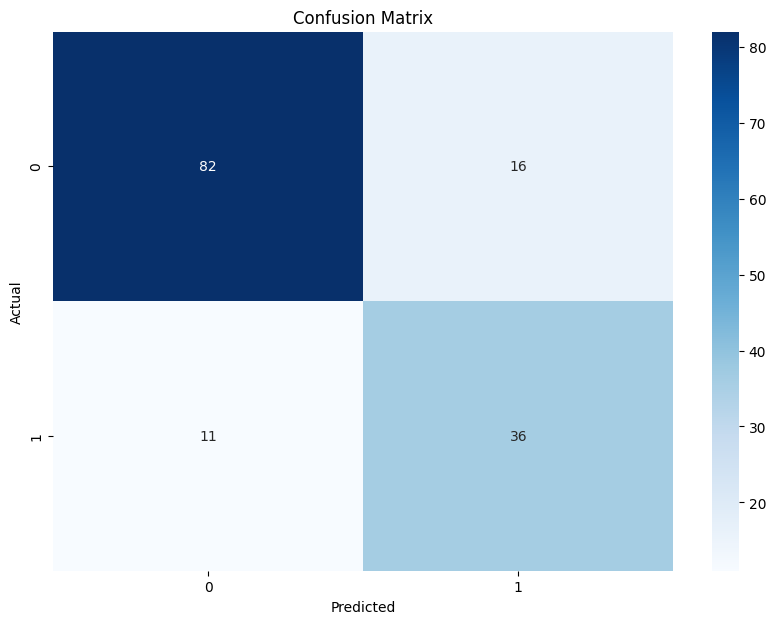

In [17]:
# TODO

labels = [0, 1]
conf_matrix = confusion_matrix_without_transform(y_val, predictions, labels)

plot_confusion_matrix(conf_matrix, labels)

### Calculate metrics

In [ ]:
# TODO

In [21]:
print(recall_score(conf_matrix))

0.7659574468085106


In [22]:
print(precision_score(conf_matrix))

0.6923076923076923


In [23]:
print(f1_score(conf_matrix))

0.7272727272727273


## Second dataset

### Load data

In [24]:
df = pd.read_csv("2.csv")

### Find the distribution


Find the number of samples from each target label.

In [25]:
# TODO
# Number of samples for each target label
target_counts = df['target'].value_counts()

# Display the counts
print(target_counts)

0    499
1    126
Name: target, dtype: int64


### Split data

In [ ]:
# TODO

In [26]:
# TODO

# ONLY USED SKLEARN FOR SPLITTING AS IT HAS SHUFFLE AND WAS ALLOWED BY THE TA
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into features and target variable
X = df.drop('target', axis=1).values  # Assuming all other columns are features
y = df['target'].values  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Train model and make predictions

In [ ]:
# TODO

In [33]:
# TODO
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")
print(feature_list)

#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

There are 14 features found in the data
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [28]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

In [29]:
# TODO
# Make predictions on the validation set
y_pred = model.predict(X_val)
predictions = y_pred

In [30]:
def accuracy_score_without_transform(y_true, y_pred):
    #TODO: Your implementation

    # Correctly predicted labels
    correct_predictions = sum(y_true == y_pred)

    # Total predictions
    total_predictions = len(y_true)

    accuracy = correct_predictions / total_predictions

    return accuracy

In [32]:
print(accuracy_score_without_transform(y_val, predictions))

0.872


### Plot confusion matrix

In [ ]:
# TODO

In [34]:
def confusion_matrix_without_transform(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix

    # Creating a mapping of labels to indices
    label_to_index = {label: index for index, label in enumerate(labels)}

    # Now populating the confusion matrix
    for a, p in zip(actual, predicted):
        matrix[label_to_index[a]][label_to_index[p]] += 1

    return matrix

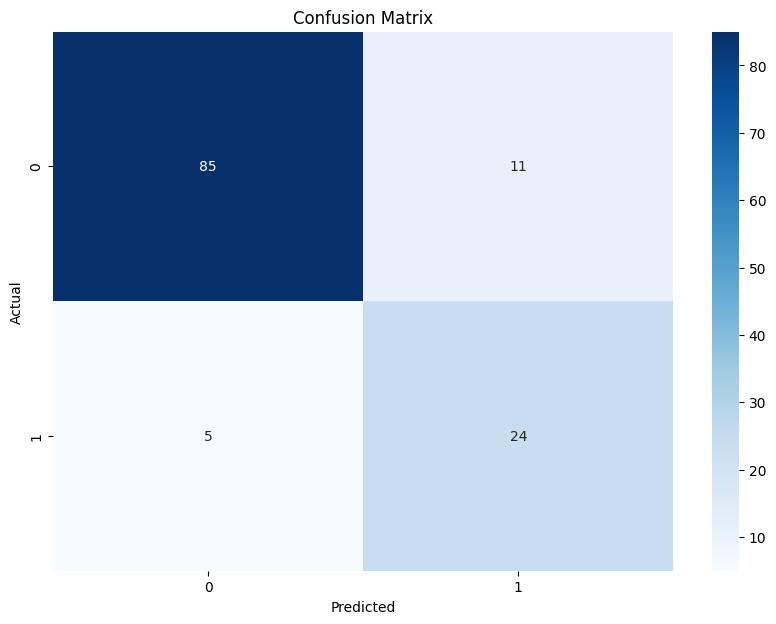

In [35]:
# TODO

labels = [0, 1]
conf_matrix = confusion_matrix_without_transform(y_val, predictions, labels)

plot_confusion_matrix(conf_matrix, labels)

### Calculate metrics

In [ ]:
# TODO

In [36]:
print(recall_score(conf_matrix))

0.8275862068965517


In [37]:
print(precision_score(conf_matrix))

0.6857142857142857


In [38]:
print(f1_score(conf_matrix))

0.75


## Third dataset

### Load data

In [39]:
df = pd.read_csv("3.csv")

### Find the distribution


Find the number of samples from each target label.

In [ ]:
# TODO

In [40]:
# TODO
# Number of samples for each target label
target_counts = df['target'].value_counts()

# Display the counts
print(target_counts)

0    499
1     26
Name: target, dtype: int64


### Split data

In [ ]:
# TODO

In [41]:
# TODO

# ONLY USED SKLEARN FOR SPLITTING AS IT HAS SHUFFLE AND WAS ALLOWED BY THE TA
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into features and target variable
X = df.drop('target', axis=1).values  # Assuming all other columns are features
y = df['target'].values  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Train model and make predictions

In [ ]:
# TODO

In [42]:
# TODO
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")
print(feature_list)

#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

There are 14 features found in the data
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [43]:
# TODO
model = MixedDataNB()
model.fit(X_train, y_train)

In [44]:
# TODO
# Make predictions on the validation set
y_pred = model.predict(X_val)
predictions = y_pred

In [45]:
def accuracy_score_without_transform(y_true, y_pred):
    #TODO: Your implementation

    # Correctly predicted labels
    correct_predictions = sum(y_true == y_pred)

    # Total predictions
    total_predictions = len(y_true)

    accuracy = correct_predictions / total_predictions

    return accuracy

In [46]:
print(accuracy_score_without_transform(y_val, predictions))

0.8952380952380953


### Plot confusion matrix

In [ ]:
# TODO

In [47]:
def confusion_matrix_without_transform(actual, predicted, labels):
    # TODO: Initialize the confusion matrix
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # TODO: Populate the confusion matrix

    # Creating a mapping of labels to indices
    label_to_index = {label: index for index, label in enumerate(labels)}

    # Now populating the confusion matrix
    for a, p in zip(actual, predicted):
        matrix[label_to_index[a]][label_to_index[p]] += 1

    return matrix

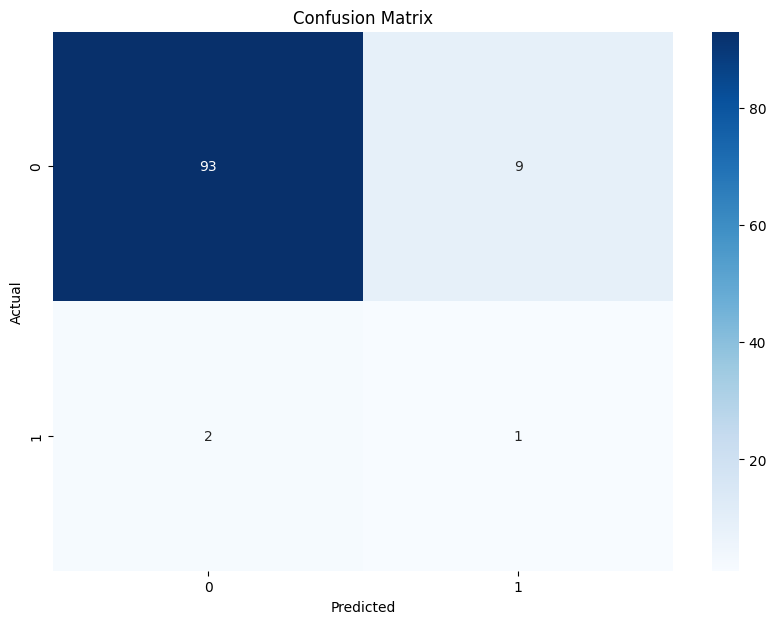

In [48]:
# TODO

labels = [0, 1]
conf_matrix = confusion_matrix_without_transform(y_val, predictions, labels)

plot_confusion_matrix(conf_matrix, labels)

### Calculate metrics

In [ ]:
# TODO

In [49]:
print(recall_score(conf_matrix))

0.3333333333333333


In [50]:
print(precision_score(conf_matrix))

0.1


In [51]:
print(f1_score(conf_matrix))

0.15384615384615383


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

**Answer:**

while accuracy provides a general idea of the overall model performance, the F1 score is more appropriate for evaluating models on imbalanced datasets. The F1 score is a harmonic mean of precision and recall, offering a balance that considers both false positives and false negatives, which is crucial in imbalanced scenarios.

This shows itself in the results for "3.csv" where a high accuracy contrasts highly with a low F1 score, indicating the model's struggles with the minority class despite a seemingly high overall accuracy. The F1 score, therefore, provides a more accurate view of the model's performance across different classes in compare to accuracy alone which is more likely a majority checking metric, making it a valuable metric in the presence of class imbalance.